In [1]:
import diplib as dip
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 72

DIPlib -- a quantitative image analysis library
Version 3.5.1 (Jul  5 2024)
For more information see https://diplib.org


In [3]:
img = dip.ImageRead('E:\\JKZ_programs\\shanneng\\diplib-notebooks\\cameraman.tif')
# img = dip.Image(img)
smooth = dip.Gauss(img, 5)
print(img.DataType())
print(smooth.DataType())

UINT8
SFLOAT


In [5]:
smooth = dip.Image()
dip.Gauss(img, out = smooth, sigmas = 5)
print(smooth.DataType())

SFLOAT


In [6]:
smooth = dip.Image()
smooth.SetDataType("UINT8") # Set the data type of the image to UINT8
smooth.Protect()        # Protect the image from being modified
dip.Gauss(img, out = smooth, sigmas = 5)
print(smooth.DataType())

UINT8


2D Scalar image:
    data type:      UINT8
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   000001693FE98970 (shared among 1 images)
    origin pointer: 000001693EDF3580



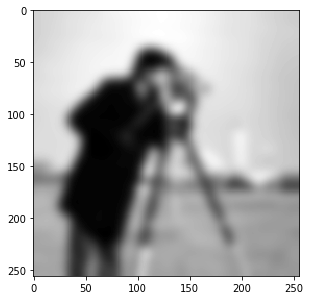

2D Scalar image:
    data type:      UINT8
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   000001693FE98970 (shared among 1 images)
    origin pointer: 000001693EDF3580



In [11]:
print(img)
img.Show()
img.Protect()
dip.Gauss(img, out = img, sigmas = 5)
print(img)

## 彩色图像处理

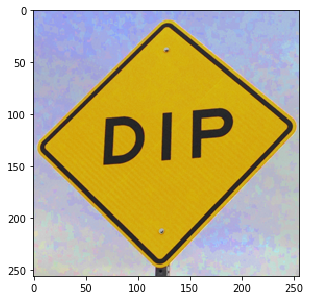

In [12]:
img = dip.Image(dip.ImageRead('E:\JKZ_programs\shanneng\diplib-notebooks\DIP.tif'))
img.Show()

In [13]:
se = dip.SE(25, "rectangular")  # 创建结构元素
try:
    dip.Dilation(img, se=se)    # 膨胀
except Exception as e:
    print(f"\033[31m{type(e).__name__} exception:", str(e).split('\n')[0])

ParameterError exception: Image is not scalar


### 无法使用'dip.Dilation'函数处理彩色图像，该函数可以应用于单通道图像。

In [ ]:
res = dip.Dilation(img[0], se=se)  # 对单通道图像进行膨胀

3


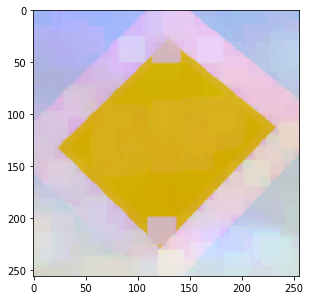

In [18]:
res = img.Similar()  # 创建一个与输入图像相似的图像 不是复制图像
print(img.TensorElements())
for ii in range(img.TensorElements()):   # img.TensorElement()返回图像的张量元素数
    dip.Dilation(img(ii), out=res(ii), se=se)  # 对每个通道进行膨胀
res.Show()

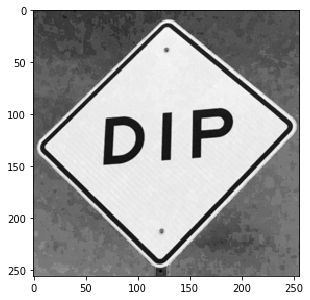

2D Scalar image:
    data type:      DFLOAT
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   000001693F096CC0 (shared among 1 images)
    origin pointer: 000001693F096CC0



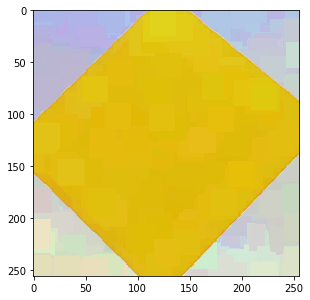

In [22]:
select = -dip.Norm(img - [255, 255, 0]) # 值是负数，数值越大（绝对值越小，接近0）说明与黄色越接近，数值越小（绝对值越大）说明与黄色越远 因此如果以图像展示，颜色越接近黄色越亮
select.Show()
res = dip.SelectionFilter(img, select, kernel=dip.Kernel(25, "rectangular"), mode="maximum")    # 选择与黄色接近的区域，也就是绝对值越小接近0的区域
res.Show()